<a href="https://colab.research.google.com/github/5-star-B/week-2/blob/main/statistic_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Statistics

This class, *Intro to Statistics*, builds on probability theory to enable us to quantify our confidence about how distributions of data are related to one another. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms. You’ll also learn how to use regression to make predictions about the future based on training data. 

The content covered in this class builds on the content of other classes in the *Machine Learning Foundations* series (linear algebra, calculus, and probability theory) and is itself foundational for the *Optimization* class. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/5-star-B/week-2

Cloning into 'week-2'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), 1.55 MiB | 7.49 MiB/s, done.


In [ ]:
cd week-2

/content/week-2


In [ ]:
!python 5_statistics 4 ML.ipynb

python3: can't open file '/content/week-2/5_statistics': [Errno 2] No such file or directory


Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning. 
* Hypothesize about and critically evaluate the inputs and outputs of machine learning algorithms using essential statistical tools such as the t-test, ANOVA, and R-squared. 
* Use historical data to predict the future using regression models that take advantage of frequentist statistical theory (for smaller data sets) and modern machine learning theory (for larger data sets), including why we may want to consider applying deep learning to a given problem.


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Frequentist Statistics*

* Frequentist vs Bayesian Statistics
* Review of Relevant Probability Theory
* *z*-scores and Outliers
* *p*-values
* Comparing Means with t-tests
* Confidence Intervals
* ANOVA: Analysis of Variance
* Pearson Correlation Coefficient
* R-Squared Coefficient of Determination
* Correlation vs Causation
* Correcting for Multiple Comparisons 

*Segment 2: Regression*

* Features: Independent vs Dependent Variables
* Linear Regression to Predict Continuous Values 
* Fitting a Line to Points on a Cartesian Plane
* Ordinary Least Squares
* Logistic Regression to Predict Categories 

*Segment 3: Bayesian Statistics*

* (Deep) ML vs Frequentist Statistics
* When to use Bayesian Statistics
* Prior Probabilities
* Bayes’ Theorem
* PyMC3 Notebook
* Resources for Further Study of Probability and Statistics

## Segment 1: Frequentist Statistics

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [ ]:
# for left skewed change 1st arg to negative
x = st.skewnorm.rvs(10, size=55000)

In [ ]:
x[0:10]

array([0.54397454, 0.18013325, 0.66906422, 1.37065682, 0.00666894,
       0.19170549, 1.74127744, 0.73714774, 0.57161011, 0.49095703])

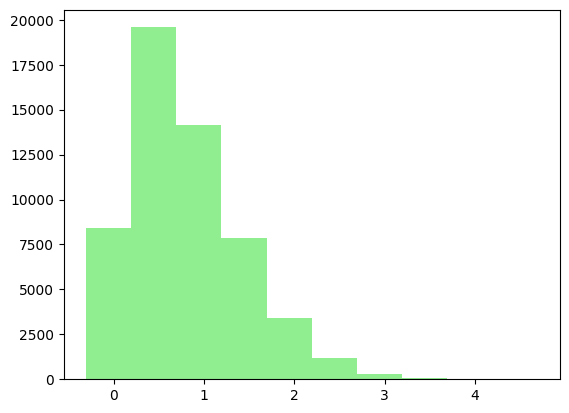

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgreen')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [ ]:
xbar = x.mean()
xbar

0.7945806052114792

In [ ]:
# -0.7899339857689391

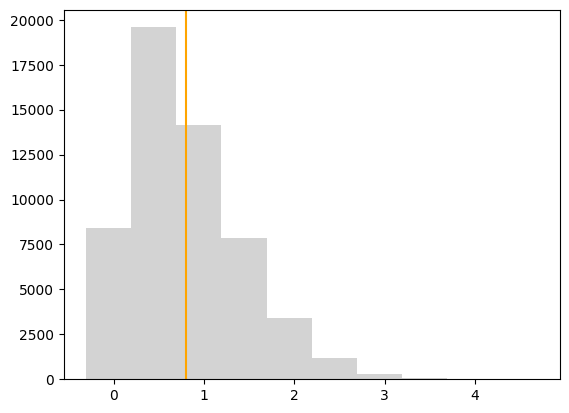

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [ ]:
np.median(x) 

0.6768759166225083

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

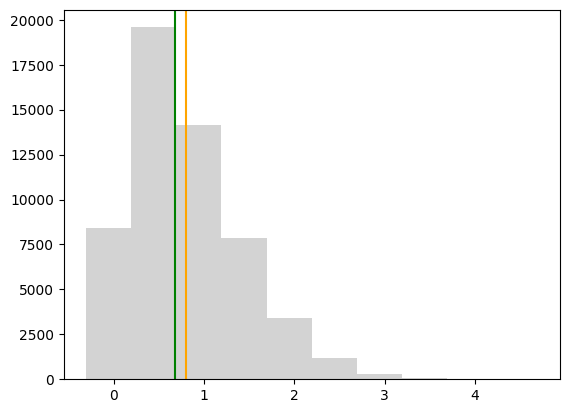

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
x.var()

0.36965218362451957

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [ ]:
x.var()**(1/2)

0.6079902825082977

In [ ]:
sigma = x.std()
sigma

0.6079902825082977

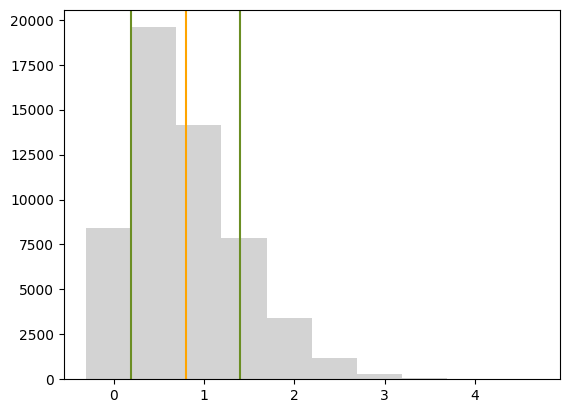

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
sigma/(x.size)**(1/2)

0.0025924792753603803

In [ ]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.002592502843675179

In [ ]:
st.sem(x, ddof=0)

0.0025924792753603803

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**: 

In [ ]:
x = np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

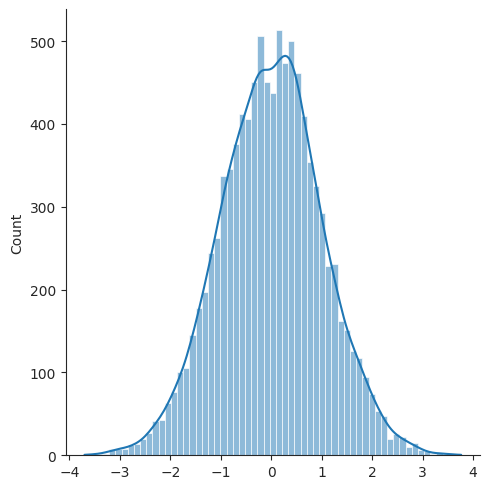

In [ ]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [ ]:
x.mean()
# -0.009264171747108127

0.00490943856826445

In [ ]:
x.std()

1.0068724974483239

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [ ]:
x_sample = np.random.choice(x, size=5, replace=False)
x_sample

array([-0.22490499,  2.01040053,  1.06711961,  0.18370818,  0.73356988])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [ ]:
x_sample.mean()

0.7539786419279559

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [ ]:
xc = sample_mean_calculator(x, 25, 70)

In [ ]:
xc

[0.11203971966169793,
 0.1950795372190813,
 -0.004243466084257536,
 0.2524982393478086,
 -0.24665367184348344,
 0.10431006337282113,
 0.18685258730745663,
 0.109550819089533,
 -0.01726099048568559,
 -0.4672392919769585,
 0.056707342424990405,
 0.1087390296009007,
 -0.2588717800057742,
 -0.0009061916083746357,
 -0.12366068588437912,
 0.06892552060506621,
 -0.17455863774948838,
 0.10279435758781419,
 0.14059849902525662,
 -0.15799741372104084,
 0.04229722483838839,
 0.2997982909843981,
 0.24497292299878398,
 -0.3288883504700749,
 0.22284328522894484,
 0.0020889390833636833,
 -0.004500751949024911,
 0.12474289931197546,
 -0.1651597719000214,
 0.25100528787767434,
 -0.0005597388795986835,
 0.018730347812666782,
 -0.11752526987814087,
 -0.21941549216260525,
 0.27121407890545673,
 -0.4455007796166069,
 -0.1455179784728938,
 -0.3543057789450965,
 -0.2091104705775545,
 -0.010861719268772694,
 -0.20303278571370353,
 -0.4579795212018743,
 -0.024162258320621736,
 -0.053191891639709776,
 -0.333003

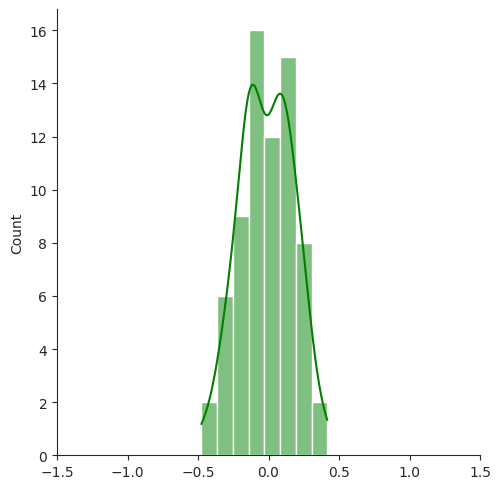

In [ ]:
sns.displot(sample_mean_calculator(x, 25, 70), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

# 21-4-2022 done

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

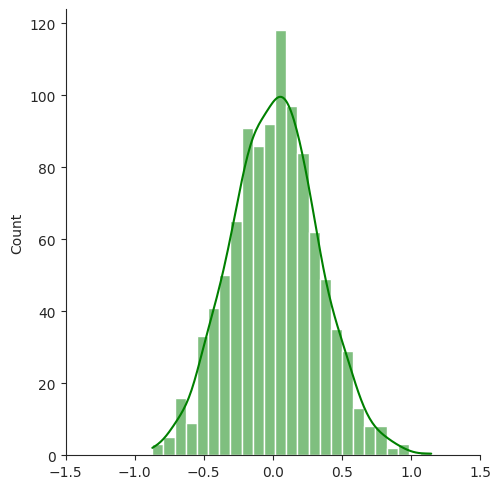

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

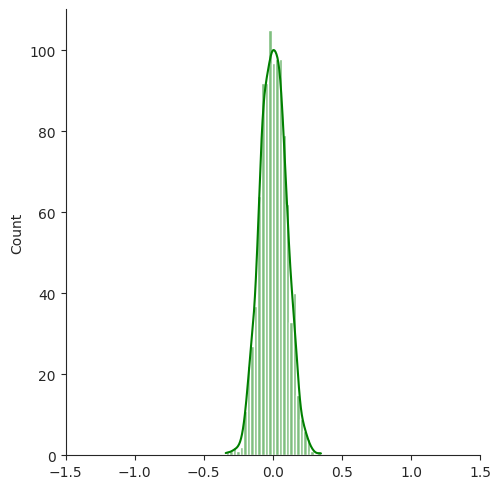

In [ ]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

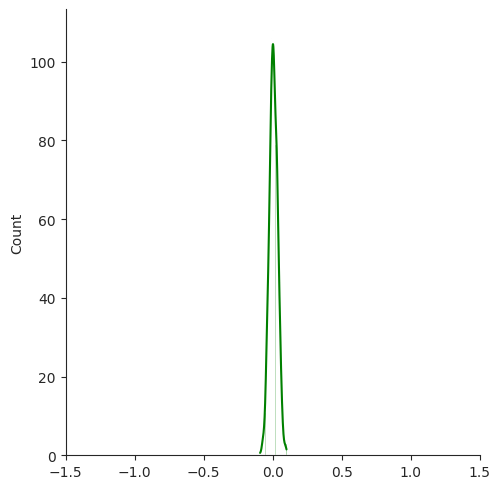

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [ ]:
s = st.skewnorm.rvs(10, size=10000)

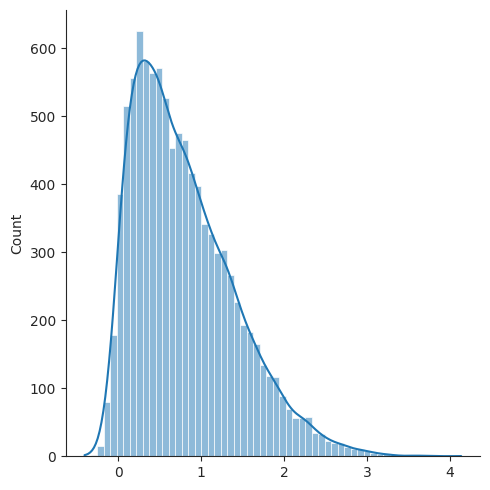

In [ ]:
_ = sns.displot(s, kde=True)

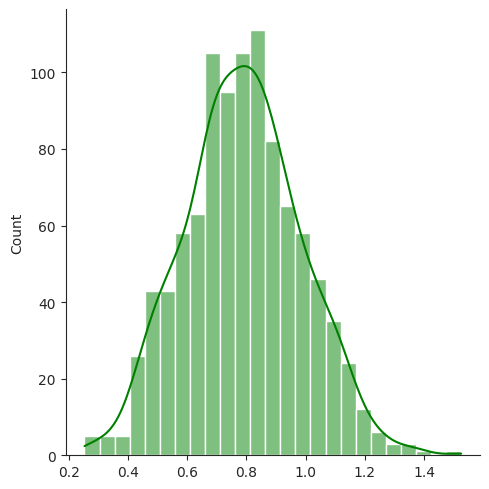

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

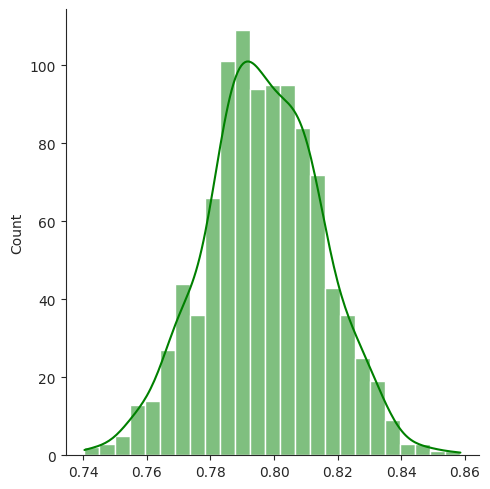

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 7.0, size=5000)))

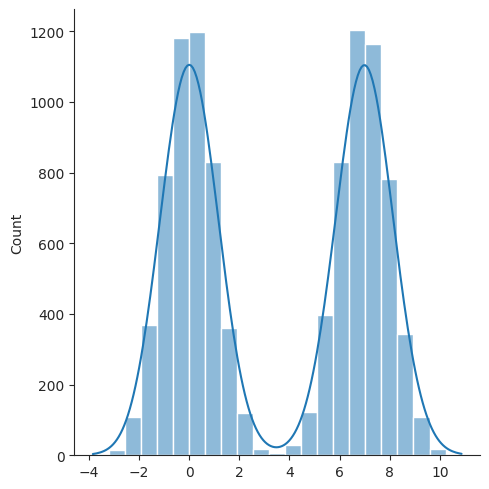

In [ ]:
_ = sns.displot(m, kde=True)

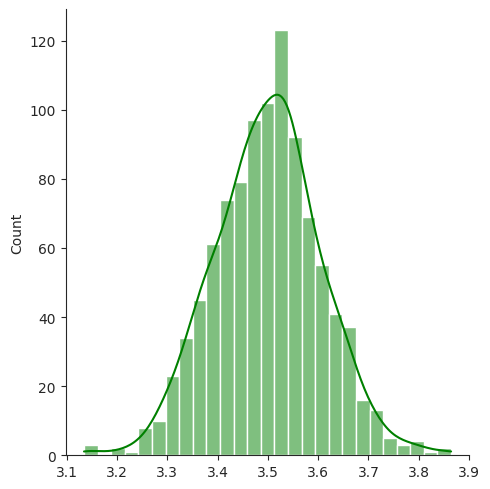

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

In [ ]:
u = np.random.uniform(size=10000)

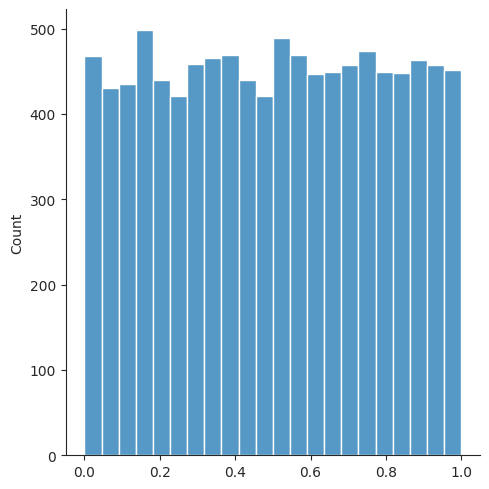

In [ ]:
_ = sns.displot(u)

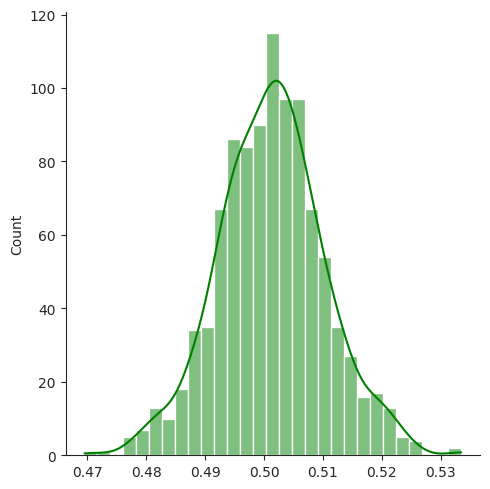

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [ ]:
x_i = 85
mu = 60
sigma = 10

In [ ]:
x = np.random.normal(mu, sigma, 10000)

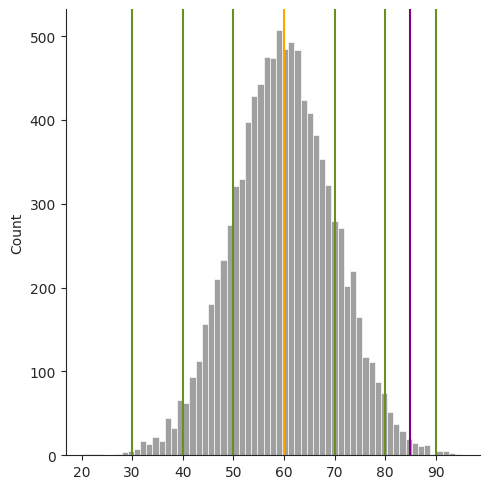

In [ ]:
sns.displot(x, color='gray')
ax.set_xlim(50, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean: 

In [ ]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students: 

In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

2.5263070268243593

Less than one percent of the class outperformed you: 

In [ ]:
len(np.where(x > 85)[0])

58

In [ ]:
100*68/10000

0.68

In [ ]:
np.percentile(x, 99.5)

85.67165040646216

In contrast, if the mean score of your peers is 90 and the standard deviation is 2: 

In [ ]:
mu = 90
sigma = 2

In [ ]:
y = np.random.normal(mu, sigma, 10000)

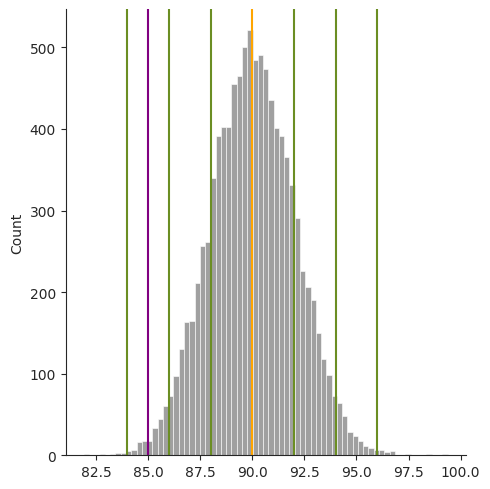

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!): 

In [ ]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students: 

In [ ]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.479185623867882

In which case, over 99% of the class outperformed you: 

In [ ]:
len(np.where(y > 85)[0])

9943

In [ ]:
100*9933/10000

99.33

A mere 67 folks attained worse: 

In [ ]:
10000-9933

67

In [ ]:
np.percentile(y, 1)

85.42260713659499

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**. 

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

**Exercises**

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch? 
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition? 

**Spoiler alert**: Solutions below

**Solutions**
1. zero
2. two
3. four (you may have won the meet!)

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone. 

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time: 
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF): 

In [ ]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [ ]:
p_below*10000

62.096653257761325

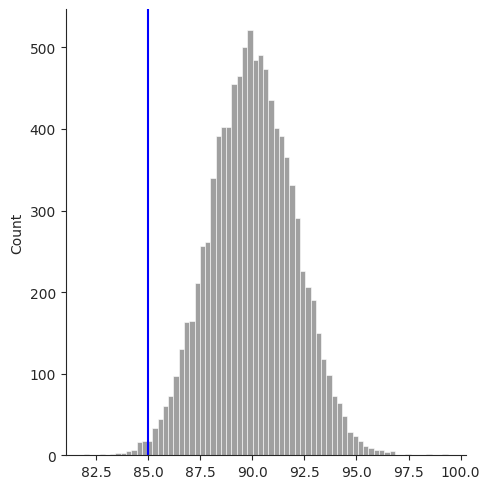

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [ ]:
st.norm.cdf(2.5)

0.9937903346742238

In [ ]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [ ]:
p_above*10000

62.09665325776159

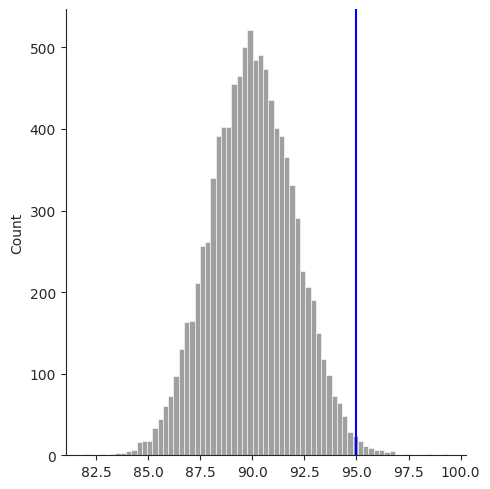

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [ ]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [ ]:
p_outside*10000

124.1933065155229

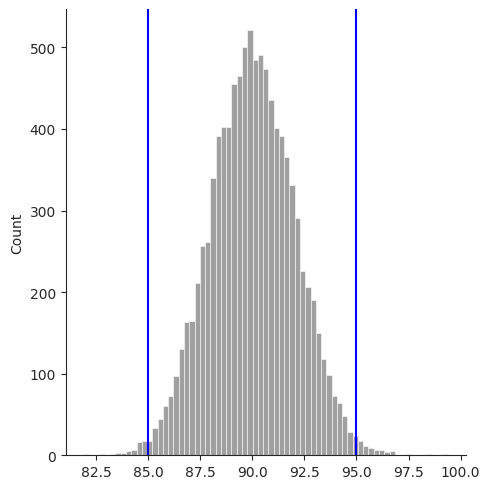

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by ** chance alone ** is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb) for proof.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top: 

In [ ]:
st.norm.ppf(.025)

-1.9599639845400545

In [ ]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

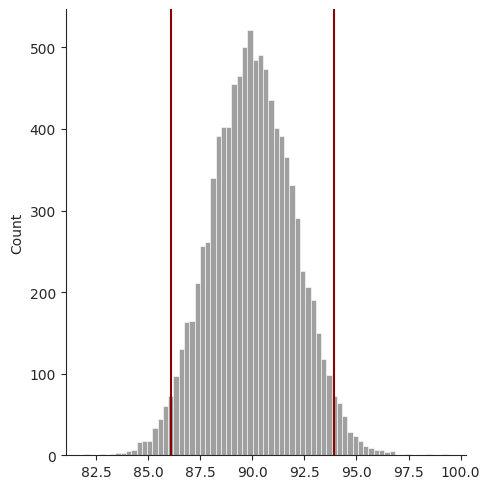

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

With a stricter threshold, say $\alpha = .01$:

In [ ]:
st.norm.ppf(.005)

-2.575829303548901

In [ ]:
st.norm.ppf(.995)

2.5758293035489004

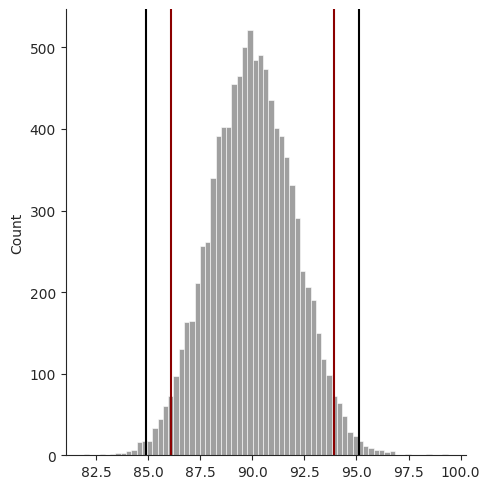

In [ ]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

(Time-permitting, a discussion of two-tailed vs one-tailed *p*-value tests would be informative here.)